<a href="https://colab.research.google.com/github/FrankAlvaradoR/Teor-a-de-Control/blob/main/Estabilidad_del_sistema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control

# Estabilidad del sistema con Python



## Ejemplo 1 H(s) con polos no repetidos

Desarrollo analítico

Se expresa la ecuación de operadores diferenciales por la transformada de Laplace

\begin{align}
  \frac{Y(s)}{X(s)}=\frac{s-3}{(s+1)(s^2+4s+8)}
\end{align}

El grado del polinomio Q es N=3 y es mayor que el grado del polinomio P donde M=1.



In [24]:
import control as co
import numpy as np
import matplotlib.pyplot as plt

s=co.tf('s') # La variable de la función de transferencia

G = (s-3)/((s+1)*(s**2+4*s+8))
print(G)
poles = G.poles() # Los polos de la función
print("los polos son:")
print(poles)



        s - 3
----------------------
s^3 + 5 s^2 + 12 s + 8

los polos son:
[-2.+2.j -2.-2.j -1.+0.j]


Segunda alternativa de análisis

H(s):
        s - 3         
──────────────────────
        ⎛ 2          ⎞
(s + 1)⋅⎝s  + 4⋅s + 8⎠

 Fracciones parciales:
    4⋅s + 17           4    
──────────────── - ─────────
  ⎛ 2          ⎞   5⋅(s + 1)
5⋅⎝s  + 4⋅s + 8⎠            

 polos:     {-1: 1, -2 - 2*I: 1, -2 + 2*I: 1}
 polos reales:  1
 polos complejos:  2
 sobre lado derecho RHP: 0
 sobre Eje Imaginario, repetidos:  0  unicos: 0

 asintoticamente:  estable

 h(t): 
                           -2⋅t           -t     
(9⋅sin(2⋅t) + 8⋅cos(2⋅t))⋅ℯ    ⋅θ(t)   4⋅ℯ  ⋅θ(t)
──────────────────────────────────── - ──────────
                 10                        5     


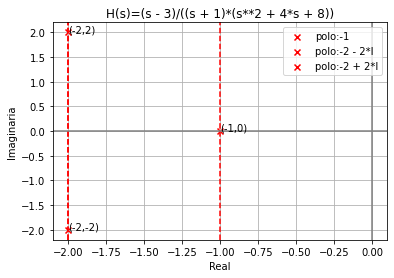

In [83]:
# Polos y ceros de funcion de transferencia H(s)
# Estabilidad del sistema, H(s) respuesta al impulso
# Ps es numerador, Qs es denominador
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# INGRESO
s  = sym.Symbol('s')
t  = sym.Symbol('t')

Hs = ((s-3)/(s+1))*(1/(s**2+4*s+8))
#Hs = 1+0*s cuando es constante

# Grafica, intervalo tiempo [t_a,t_b]
t_a = -1 ; t_b = 10
muestras = 101  # 51 resolucion grafica

# PROCEDIMIENTO
Hsp = sym.apart(Hs,s) # fracciones parciales

# Transformada Inversa de Laplace
if not(Hsp.is_Add): # un termino
    ht = sym.inverse_laplace_transform(Hsp,s,t)
else:
    ht = 0*t  # expresion vacia en t
    for term_suma in Hsp.args: # termino suma
        term_t = sym.inverse_laplace_transform(term_suma,s,t)
        ht = ht + term_t

# polos s en Hs
[P,Q] = Hs.as_numer_denom()
P = P.as_poly(s)  # numerador
Q = Q.as_poly(s)  # denominador
Q_raiz = sym.roots(Q)

cuenta_real = len(sym.real_roots(Q))
cuenta_imag = len(Q_raiz)-cuenta_real


# Analiza estabilidad asintotica
# Separa parte real e imaginaria de raices
unicos = 0 ; repetidos = 0 ; enRHP = 0
for raiz in Q_raiz:
    [r_real,r_imag] = raiz.as_real_imag()
    # para estabilidad asintotica
    conteo = Q_raiz[raiz]
    if conteo==1 and r_real==0 and abs(r_imag)>0:
        unicos = unicos + 1
    if conteo>1  and r_real==0 and abs(r_imag)>0:
        repetidos = repetidos + 1
    if r_real>0:
        enRHP = enRHP + 1

# Revisa lado derecho del plano RHP
asintota = ""
if enRHP==0:
    asintota = 'estable'
if enRHP>0 or repetidos>0:
    asintota = 'inestable'
if enRHP==0 and unicos>0:
    asintota = 'marginalmente estable'

# SALIDA
print('H(s):')
sym.pprint(Hs)
print('\n Fracciones parciales:')
sym.pprint(Hsp)
print('\n polos:    ',Q_raiz)
print(' polos reales: ',cuenta_real)
print(' polos complejos: ',cuenta_imag)
print(' sobre lado derecho RHP:',enRHP)
print(' sobre Eje Imaginario, repetidos: ',
      repetidos,' unicos:', unicos)
print('\n asintoticamente: ', asintota)

print('\n h(t): ')
sym.pprint(ht)


# GRAFICA
# grafica Polos de H(s)
figura, graf_Fsi = plt.subplots()
# grafica los polos
for raiz in Q_raiz.keys():
    x_polo = sym.re(raiz)
    y_polo = sym.im(raiz)
    plt.scatter(x_polo,y_polo,
                marker='x',color='red',
                label='polo:'+str(raiz))
    plt.axvline(x_polo,color='red',
                linestyle='dashed')
    etiqueta = "("+str(x_polo)+','+str(y_polo)+")"
    plt.annotate(etiqueta,(x_polo,y_polo))
plt.axvline(0, color='gray')
plt.axhline(0, color='gray')
plt.xlabel('Real')
plt.ylabel('Imaginaria')
plt.title('H(s)='+str(Hs))
plt.legend()
plt.grid()

def Heaviside(yh):
  ft = sym.Heaviside(yh)
  return ft


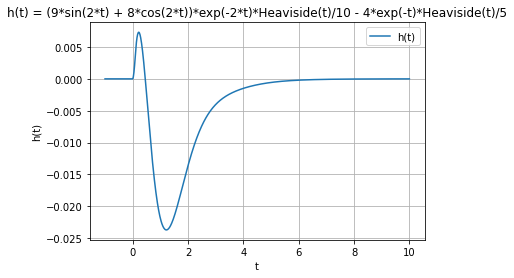

In [84]:
# valores para GRAFICA -----------
# f(t) # evalua en intervalo
##fta = sym.lambdify(t,ht) #,modules=equivalentes)
##ti  = np.linspace(t_a,t_b,muestras)
##fti = fta(ti)
ti  = np.linspace(t_a,t_b,1000)
u = lambda t: np.heaviside(t,1)
dt = 0.1
impulso = lambda t,dt: u(t)-u(t-dt)

x=(9*np.sin(2*ti)+8*np.cos(2*ti)*np.exp(-2*ti)*u(ti))/10 - 4*np.exp(-ti)*u(ti)/5
x = impulso(ti,dt)


_,y, = co.forced_response(G, ti,x )
# grafica f(t) 
figura, graf_fti = plt.subplots()
plt.plot(ti,y,label='h(t)')
# Graficar terminos con impulso
##if len(impulsoen)>0:
##    for donde in impulsoen:
##        tk = float(donde)
##        yk = float(fta(tk))
##        etiqueta = str(yk)
##        plt.stem(tk,yk,label=str(yk)+'d(t)')
plt.xlabel('t')
plt.ylabel('h(t)')
plt.legend()
plt.title('h(t) = '+str(ht))
plt.grid()

plt.show()

## Ejemplo 2 con polos repetidos 

Desarrollo analítico

Se expresa la ecuación de operadores diferenciales por la transformada de Laplace

\begin{align}
  \frac{Y(s)}{X(s)}=\frac{s+2}{(s-1)(s^2+4s+8)}
\end{align}

El grado del polinomio Q es N=3 y es mayor que el grado del polinomio P donde M=1.



In [85]:
import control as co
import numpy as np
import matplotlib.pyplot as plt

s=co.tf('s') # La variable de la función de transferencia

G = (s+2)/((s-1)*(s**2+4*s+8))
print(G)
poles = G.poles() # Los polos de la función
print("los polos son:")
print(poles)



        s + 2
---------------------
s^3 + 3 s^2 + 4 s - 8

los polos son:
[-2.+2.j -2.-2.j  1.+0.j]


H(s):
        s + 2         
──────────────────────
        ⎛ 2          ⎞
(s - 1)⋅⎝s  + 4⋅s + 8⎠

 Fracciones parciales:
       3⋅s + 2            3     
- ───────────────── + ──────────
     ⎛ 2          ⎞   13⋅(s - 1)
  13⋅⎝s  + 4⋅s + 8⎠             

 polos:     {1: 1, -2 - 2*I: 1, -2 + 2*I: 1}
 polos reales:  1
 polos complejos:  2
 sobre lado derecho RHP: 1
 sobre Eje Imaginario, repetidos:  0  unicos: 0

 asintoticamente:  inestable

 h(t): 
                           -2⋅t           t     
(2⋅sin(2⋅t) - 3⋅cos(2⋅t))⋅ℯ    ⋅θ(t)   3⋅ℯ ⋅θ(t)
──────────────────────────────────── + ─────────
                 13                        13   


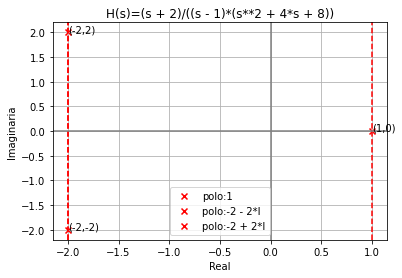

In [86]:
# Polos y ceros de funcion de transferencia H(s)
# Estabilidad del sistema, H(s) respuesta al impulso
# Ps es numerador, Qs es denominador
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# INGRESO
s  = sym.Symbol('s')
t  = sym.Symbol('t')

Hs = ((s+2)/(s-1))*(1/(s**2+4*s+8))
#Hs = 1+0*s cuando es constante

# Grafica, intervalo tiempo [t_a,t_b]
t_a = -1 ; t_b = 10
muestras = 101  # 51 resolucion grafica

# PROCEDIMIENTO
Hsp = sym.apart(Hs,s) # fracciones parciales

# Transformada Inversa de Laplace
if not(Hsp.is_Add): # un termino
    ht = sym.inverse_laplace_transform(Hsp,s,t)
else:
    ht = 0*t  # expresion vacia en t
    for term_suma in Hsp.args: # termino suma
        term_t = sym.inverse_laplace_transform(term_suma,s,t)
        ht = ht + term_t

# polos s en Hs
[P,Q] = Hs.as_numer_denom()
P = P.as_poly(s)  # numerador
Q = Q.as_poly(s)  # denominador
Q_raiz = sym.roots(Q)

cuenta_real = len(sym.real_roots(Q))
cuenta_imag = len(Q_raiz)-cuenta_real


# Analiza estabilidad asintotica
# Separa parte real e imaginaria de raices
unicos = 0 ; repetidos = 0 ; enRHP = 0
for raiz in Q_raiz:
    [r_real,r_imag] = raiz.as_real_imag()
    # para estabilidad asintotica
    conteo = Q_raiz[raiz]
    if conteo==1 and r_real==0 and abs(r_imag)>0:
        unicos = unicos + 1
    if conteo>1  and r_real==0 and abs(r_imag)>0:
        repetidos = repetidos + 1
    if r_real>0:
        enRHP = enRHP + 1

# Revisa lado derecho del plano RHP
asintota = ""
if enRHP==0:
    asintota = 'estable'
if enRHP>0 or repetidos>0:
    asintota = 'inestable'
if enRHP==0 and unicos>0:
    asintota = 'marginalmente estable'

# SALIDA
print('H(s):')
sym.pprint(Hs)
print('\n Fracciones parciales:')
sym.pprint(Hsp)
print('\n polos:    ',Q_raiz)
print(' polos reales: ',cuenta_real)
print(' polos complejos: ',cuenta_imag)
print(' sobre lado derecho RHP:',enRHP)
print(' sobre Eje Imaginario, repetidos: ',
      repetidos,' unicos:', unicos)
print('\n asintoticamente: ', asintota)

print('\n h(t): ')
sym.pprint(ht)


# GRAFICA
# grafica Polos de H(s)
figura, graf_Fsi = plt.subplots()
# grafica los polos
for raiz in Q_raiz.keys():
    x_polo = sym.re(raiz)
    y_polo = sym.im(raiz)
    plt.scatter(x_polo,y_polo,
                marker='x',color='red',
                label='polo:'+str(raiz))
    plt.axvline(x_polo,color='red',
                linestyle='dashed')
    etiqueta = "("+str(x_polo)+','+str(y_polo)+")"
    plt.annotate(etiqueta,(x_polo,y_polo))
plt.axvline(0, color='gray')
plt.axhline(0, color='gray')
plt.xlabel('Real')
plt.ylabel('Imaginaria')
plt.title('H(s)='+str(Hs))
plt.legend()
plt.grid()

def Heaviside(yh):
  ft = sym.Heaviside(yh)
  return ft


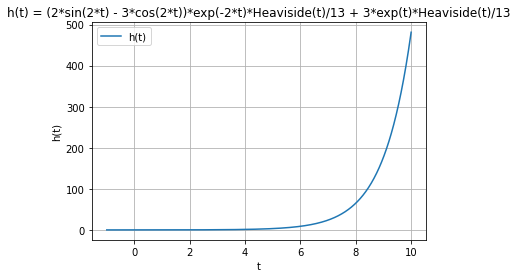

In [87]:
# valores para GRAFICA -----------

ti  = np.linspace(t_a,t_b,1000)
u = lambda t: np.heaviside(t,1)
dt = 0.1
impulso = lambda t,dt: u(t)-u(t-dt)

x = impulso(ti,dt)


_,y, = co.forced_response(G, ti,x )
# grafica f(t) 
figura, graf_fti = plt.subplots()
plt.plot(ti,y,label='h(t)')
# Graficar terminos con impulso
##if len(impulsoen)>0:
##    for donde in impulsoen:
##        tk = float(donde)
##        yk = float(fta(tk))
##        etiqueta = str(yk)
##        plt.stem(tk,yk,label=str(yk)+'d(t)')
plt.xlabel('t')
plt.ylabel('h(t)')
plt.legend()
plt.title('h(t) = '+str(ht))
plt.grid()

plt.show()

## Ejemplo 3 con polos complejos sobre eje imaginario únicos 

Desarrollo analítico

Se expresa la ecuación de operadores diferenciales por la transformada de Laplace

\begin{align}
  \frac{Y(s)}{X(s)}=\frac{s^2+s+1}{(s+2)(s^2+4)}
\end{align}

El grado del polinomio Q es N=3 y es mayor que el grado del polinomio P donde M=1.


In [91]:
import control as co
import numpy as np
import matplotlib.pyplot as plt

s=co.tf('s')
G = (s**2+s+1)/((s+2)*(s**2+4))
print(G)
poles = G.pole() # Los polos de la función
print("los polos son:")
print(poles)


     s^2 + s + 1
---------------------
s^3 + 2 s^2 + 4 s + 8

los polos son:
[-2.00000000e+00+0.j -1.58206781e-15+2.j -1.58206781e-15-2.j]


H(s):
    2           
   s  + s + 1   
────────────────
        ⎛ 2    ⎞
(s + 2)⋅⎝s  + 4⎠

 Fracciones parciales:
 5⋅s - 2         3    
────────── + ─────────
  ⎛ 2    ⎞   8⋅(s + 2)
8⋅⎝s  + 4⎠            

 polos:     {-2: 1, -2*I: 1, 2*I: 1}
 polos reales:  1
 polos complejos:  2
 sobre lado derecho RHP: 0
 sobre Eje Imaginario, repetidos:  0  unicos: 2

 asintoticamente:  marginalmente estable

 h(t): 
                                   -2⋅t     
(-sin(2⋅t) + 5⋅cos(2⋅t))⋅θ(t)   3⋅ℯ    ⋅θ(t)
───────────────────────────── + ────────────
              8                      8      


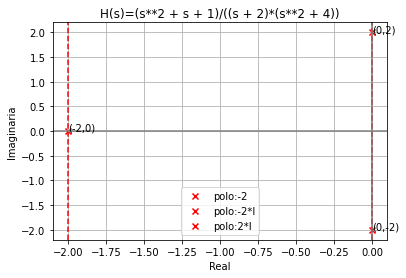

In [92]:
# Polos y ceros de funcion de transferencia H(s)
# Estabilidad del sistema, H(s) respuesta al impulso
# Ps es numerador, Qs es denominador
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# INGRESO
s  = sym.Symbol('s')
t  = sym.Symbol('t')

Hs = (s**2+s+1)/((s+2)*(s**2+4))
#Hs = 1+0*s cuando es constante

# Grafica, intervalo tiempo [t_a,t_b]
t_a = -1 ; t_b = 10
muestras = 101  # 51 resolucion grafica

# PROCEDIMIENTO
Hsp = sym.apart(Hs,s) # fracciones parciales

# Transformada Inversa de Laplace
if not(Hsp.is_Add): # un termino
    ht = sym.inverse_laplace_transform(Hsp,s,t)
else:
    ht = 0*t  # expresion vacia en t
    for term_suma in Hsp.args: # termino suma
        term_t = sym.inverse_laplace_transform(term_suma,s,t)
        ht = ht + term_t

# polos s en Hs
[P,Q] = Hs.as_numer_denom()
P = P.as_poly(s)  # numerador
Q = Q.as_poly(s)  # denominador
Q_raiz = sym.roots(Q)

cuenta_real = len(sym.real_roots(Q))
cuenta_imag = len(Q_raiz)-cuenta_real


# Analiza estabilidad asintotica
# Separa parte real e imaginaria de raices
unicos = 0 ; repetidos = 0 ; enRHP = 0
for raiz in Q_raiz:
    [r_real,r_imag] = raiz.as_real_imag()
    # para estabilidad asintotica
    conteo = Q_raiz[raiz]
    if conteo==1 and r_real==0 and abs(r_imag)>0:
        unicos = unicos + 1
    if conteo>1  and r_real==0 and abs(r_imag)>0:
        repetidos = repetidos + 1
    if r_real>0:
        enRHP = enRHP + 1

# Revisa lado derecho del plano RHP
asintota = ""
if enRHP==0:
    asintota = 'estable'
if enRHP>0 or repetidos>0:
    asintota = 'inestable'
if enRHP==0 and unicos>0:
    asintota = 'marginalmente estable'

# SALIDA
print('H(s):')
sym.pprint(Hs)
print('\n Fracciones parciales:')
sym.pprint(Hsp)
print('\n polos:    ',Q_raiz)
print(' polos reales: ',cuenta_real)
print(' polos complejos: ',cuenta_imag)
print(' sobre lado derecho RHP:',enRHP)
print(' sobre Eje Imaginario, repetidos: ',
      repetidos,' unicos:', unicos)
print('\n asintoticamente: ', asintota)

print('\n h(t): ')
sym.pprint(ht)


# GRAFICA
# grafica Polos de H(s)
figura, graf_Fsi = plt.subplots()
# grafica los polos
for raiz in Q_raiz.keys():
    x_polo = sym.re(raiz)
    y_polo = sym.im(raiz)
    plt.scatter(x_polo,y_polo,
                marker='x',color='red',
                label='polo:'+str(raiz))
    plt.axvline(x_polo,color='red',
                linestyle='dashed')
    etiqueta = "("+str(x_polo)+','+str(y_polo)+")"
    plt.annotate(etiqueta,(x_polo,y_polo))
plt.axvline(0, color='gray')
plt.axhline(0, color='gray')
plt.xlabel('Real')
plt.ylabel('Imaginaria')
plt.title('H(s)='+str(Hs))
plt.legend()
plt.grid()

def Heaviside(yh):
  ft = sym.Heaviside(yh)
  return ft


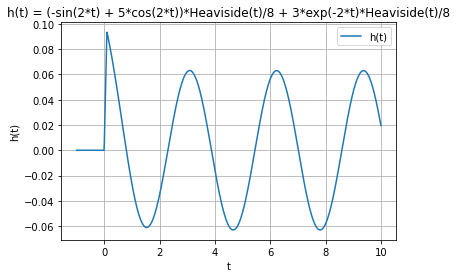

In [93]:
# valores para GRAFICA -----------

ti  = np.linspace(t_a,t_b,1000)
u = lambda t: np.heaviside(t,1)
dt = 0.1
impulso = lambda t,dt: u(t)-u(t-dt)

x = impulso(ti,dt)


_,y, = co.forced_response(G, ti,x )
# grafica f(t) 
figura, graf_fti = plt.subplots()
plt.plot(ti,y,label='h(t)')
# Graficar terminos con impulso
##if len(impulsoen)>0:
##    for donde in impulsoen:
##        tk = float(donde)
##        yk = float(fta(tk))
##        etiqueta = str(yk)
##        plt.stem(tk,yk,label=str(yk)+'d(t)')
plt.xlabel('t')
plt.ylabel('h(t)')
plt.legend()
plt.title('h(t) = '+str(ht))
plt.grid()

plt.show()

## Ejemplo 4 H(s) con polos repetidos sobre eje imaginario

Desarrollo analítico

Se expresa la ecuación de operadores diferenciales por la transformada de Laplace

\begin{align}
  \frac{Y(s)}{X(s)}=\frac{s^2+2s+8}{(s+1)(s^2+4)^2}
\end{align}

El grado del polinomio Q es N=3 y es mayor que el grado del polinomio P donde M=1.


In [97]:
import control as co
import numpy as np
import matplotlib.pyplot as plt

s=co.tf('s')
G = (s**2+2*s+8)/((s+2)*(s**2+4)**2)
print(G)
poles = G.pole() # Los polos de la función
print("los polos son:")
print(poles)


             s^2 + 2 s + 8
----------------------------------------
s^5 + 2 s^4 + 8 s^3 + 16 s^2 + 16 s + 32

los polos son:
[-2.00000000e+00+0.j          2.83223869e-08+2.00000001j
  2.83223869e-08-2.00000001j -2.83223861e-08+1.99999999j
 -2.83223861e-08-1.99999999j]


H(s):
    2            
   s  + 2⋅s + 8  
─────────────────
                2
        ⎛ 2    ⎞ 
(s + 2)⋅⎝s  + 4⎠ 

 Fracciones parciales:
    s - 2          2           1    
- ────────── + ───────── + ─────────
    ⎛ 2    ⎞           2   8⋅(s + 2)
  8⋅⎝s  + 4⎠   ⎛ 2    ⎞             
               ⎝s  + 4⎠             

 polos:     {-2: 1, -2*I: 2, 2*I: 2}
 polos reales:  1
 polos complejos:  2
 sobre lado derecho RHP: 0
 sobre Eje Imaginario, repetidos:  2  unicos: 0

 asintoticamente:  inestable

 h(t): 
                                                                -2⋅t     
(-2⋅t⋅cos(2⋅t) + sin(2⋅t))⋅θ(t)   (sin(2⋅t) - cos(2⋅t))⋅θ(t)   ℯ    ⋅θ(t)
─────────────────────────────── + ────────────────────────── + ──────────
               8                              8                    8     


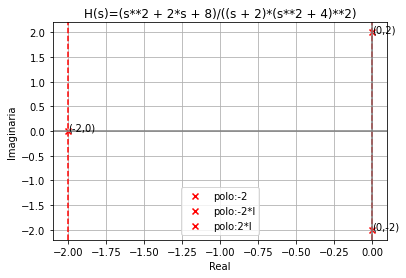

In [94]:
# Polos y ceros de funcion de transferencia H(s)
# Estabilidad del sistema, H(s) respuesta al impulso
# Ps es numerador, Qs es denominador
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# INGRESO
s  = sym.Symbol('s')
t  = sym.Symbol('t')

Hs = (s**2+2*s+8)/((s+2)*(s**2+4)**2)
#Hs = 1+0*s cuando es constante

# Grafica, intervalo tiempo [t_a,t_b]
t_a = -1 ; t_b = 10
muestras = 101  # 51 resolucion grafica

# PROCEDIMIENTO
Hsp = sym.apart(Hs,s) # fracciones parciales

# Transformada Inversa de Laplace
if not(Hsp.is_Add): # un termino
    ht = sym.inverse_laplace_transform(Hsp,s,t)
else:
    ht = 0*t  # expresion vacia en t
    for term_suma in Hsp.args: # termino suma
        term_t = sym.inverse_laplace_transform(term_suma,s,t)
        ht = ht + term_t

# polos s en Hs
[P,Q] = Hs.as_numer_denom()
P = P.as_poly(s)  # numerador
Q = Q.as_poly(s)  # denominador
Q_raiz = sym.roots(Q)

cuenta_real = len(sym.real_roots(Q))
cuenta_imag = len(Q_raiz)-cuenta_real


# Analiza estabilidad asintotica
# Separa parte real e imaginaria de raices
unicos = 0 ; repetidos = 0 ; enRHP = 0
for raiz in Q_raiz:
    [r_real,r_imag] = raiz.as_real_imag()
    # para estabilidad asintotica
    conteo = Q_raiz[raiz]
    if conteo==1 and r_real==0 and abs(r_imag)>0:
        unicos = unicos + 1
    if conteo>1  and r_real==0 and abs(r_imag)>0:
        repetidos = repetidos + 1
    if r_real>0:
        enRHP = enRHP + 1

# Revisa lado derecho del plano RHP
asintota = ""
if enRHP==0:
    asintota = 'estable'
if enRHP>0 or repetidos>0:
    asintota = 'inestable'
if enRHP==0 and unicos>0:
    asintota = 'marginalmente estable'

# SALIDA
print('H(s):')
sym.pprint(Hs)
print('\n Fracciones parciales:')
sym.pprint(Hsp)
print('\n polos:    ',Q_raiz)
print(' polos reales: ',cuenta_real)
print(' polos complejos: ',cuenta_imag)
print(' sobre lado derecho RHP:',enRHP)
print(' sobre Eje Imaginario, repetidos: ',
      repetidos,' unicos:', unicos)
print('\n asintoticamente: ', asintota)

print('\n h(t): ')
sym.pprint(ht)


# GRAFICA
# grafica Polos de H(s)
figura, graf_Fsi = plt.subplots()
# grafica los polos
for raiz in Q_raiz.keys():
    x_polo = sym.re(raiz)
    y_polo = sym.im(raiz)
    plt.scatter(x_polo,y_polo,
                marker='x',color='red',
                label='polo:'+str(raiz))
    plt.axvline(x_polo,color='red',
                linestyle='dashed')
    etiqueta = "("+str(x_polo)+','+str(y_polo)+")"
    plt.annotate(etiqueta,(x_polo,y_polo))
plt.axvline(0, color='gray')
plt.axhline(0, color='gray')
plt.xlabel('Real')
plt.ylabel('Imaginaria')
plt.title('H(s)='+str(Hs))
plt.legend()
plt.grid()

def Heaviside(yh):
  ft = sym.Heaviside(yh)
  return ft


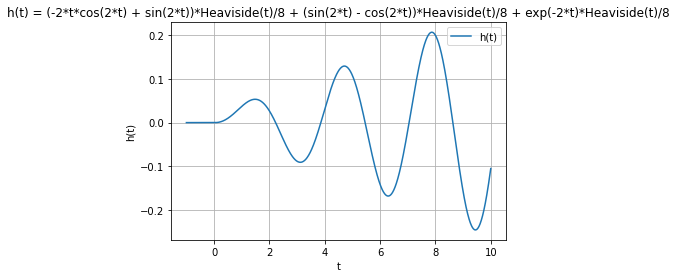

In [98]:
# valores para GRAFICA -----------

ti  = np.linspace(t_a,t_b,1000)
u = lambda t: np.heaviside(t,1)
dt = 0.1
impulso = lambda t,dt: u(t)-u(t-dt)

x = impulso(ti,dt)


_,y, = co.forced_response(G, ti,x )
# grafica f(t) 
figura, graf_fti = plt.subplots()
plt.plot(ti,y,label='h(t)')
# Graficar terminos con impulso
##if len(impulsoen)>0:
##    for donde in impulsoen:
##        tk = float(donde)
##        yk = float(fta(tk))
##        etiqueta = str(yk)
##        plt.stem(tk,yk,label=str(yk)+'d(t)')
plt.xlabel('t')
plt.ylabel('h(t)')
plt.legend()
plt.title('h(t) = '+str(ht))
plt.grid()

plt.show()

## Ejemplo 5 H(s) con suma de términos y exponenciales de retraso en tiempo
Desarrollo analítico

Se expresa la ecuación de operadores diferenciales por la transformada de Laplace

\begin{align}
  \frac{Y(s)}{X(s)}=\frac{s+2}{(s-1)}+\frac{e^{-2s}}{s-2}
\end{align}



H(s):
         -2⋅s
s + 2   ℯ    
───── + ─────
s - 1   s - 2

 Fracciones parciales:
             -2⋅s
      3     ℯ    
1 + ───── + ─────
    s - 1   s - 2

 polos:     {1: 1, 2: 1}
 polos reales:  2  complejos:  0
 sobre lado derecho RHP: 2
 sobre Eje Imaginario, repetidos:  0  unicos: 0

 asintoticamente:  inestable

 h(t): 
   t         2⋅t - 4                
3⋅ℯ ⋅θ(t) + ℯ       ⋅θ(t - 2) + δ(t)

 impulsoen: [0.]


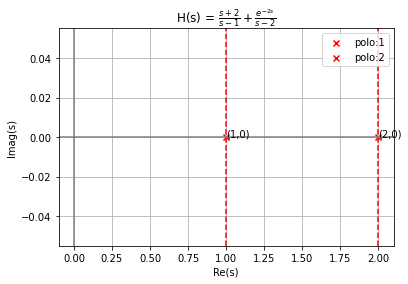

In [101]:
def separa_exp(Fs):
    ''' separa sym.exp de Fs de un termino simple 
        para obtener fracciones parciales de Fs
    '''
    term_exp = 1  # si no hay sym.exp()
    if Fs.has(sym.exp):
        if not(Fs.is_Mul):
            Fs = Fs.subs(s,0) # parte constante
        else: # separa exponencial
            for term_mul in Fs.args:
                if term_mul.has(sym.exp):
                    term_exp  = term_mul.expand(s)
                    constante = term_exp.subs(s,0)
                    Fs = sym.powsimp(Fs/term_exp)*constante
                    term_exp = sym.powsimp(term_exp/constante)
    return([Fs,term_exp])

def revisa_polos(Fsp):
    ''' revisa polos de Fsp (divisiones para cero) 
        y cuenta las veces que aparecen,
        analiza separando sym.exp
    '''
    [Fsp,term_exp] = separa_exp(Fsp)
    # polos s Fs en termino de fraccion parcial
    [P,Q] = Fsp.as_numer_denom()
    P = P.as_poly(s)  # numerador
    Q = Q.as_poly(s)  # denominador
    Q_raiz = sym.roots(Q)
    return (Q_raiz)
# Polos y ceros de funcion de transferencia H(s)
# Estabilidad del sistema, H(s) respuesta al impulso
# Ps es numerador, Qs es denominador
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
equivalentes = [{'DiracDelta': lambda x: 1*(x==0)},
                {'Heaviside': lambda x,y: np.heaviside(x, 1)},
                'numpy']

# INGRESO
s  = sym.Symbol('s')
t  = sym.Symbol('t')

Hs = (s+2)/(s-1) + sym.exp(-2*s)/(s-2)
#Hs = (s**2+s+8)/((s+1)*(s**2+4)**2)
#Hs = (s**2+s+1)/((s+2)*(s**2+4))
#Hs = ((s-3)/(s+1))*(1/(s**2+4*s+8))
#Hs = 1+0*s cuando es constante

# Grafica, intervalo tiempo [t_a,t_b]
t_a = -1 ; t_b = 3
muestras = 101  # 51 resolucion grafica

# PROCEDIMIENTO
# fracciones parciales
def separa_exp(Fs):
    ''' separa sym.exp de Fs de un termino simple 
        para obtener fracciones parciales de Fs
    '''
    term_exp = 1  # si no hay sym.exp()
    if Fs.has(sym.exp):
        if not(Fs.is_Mul):
            Fs = Fs.subs(s,0) # parte constante
        else: # separa exponencial
            for term_mul in Fs.args:
                if term_mul.has(sym.exp):
                    term_exp  = term_mul.expand(s)
                    constante = term_exp.subs(s,0)
                    Fs = sym.powsimp(Fs/term_exp)*constante
                    term_exp = sym.powsimp(term_exp/constante)
    return([Fs,term_exp])

def expande_frac_parc(Fs):
    '''expande Fs en fracciones parciales
       considera términos con sym.exp
    '''
    # cuando multiplica expresiones con Sym.exp
    # usado en Y(s)=H(s)*X(s)
    if not(Fs.is_Add) and Fs.has(sym.exp):
        cuentaexp = 0
        for term_mul in Fs.args:
            if term_mul.has(sym.exp):
                cuentaexp = cuentaexp +1
        if cuentaexp>1:
            Fs = Fs.expand()
            if Fs.is_Add: # suma de terminos
                suma = 0*s # reagrupa sym.exp
                for term_suma in Fs.args:
                    suma = suma + sym.simplify(term_suma)
                Fs = suma
                
    # Fs en fracciones parciales, términos simples
    Fsp = 0*s # expresion vacia
    if not(Fs.is_Add): # termino simple
        [Fsk,term_exp] = separa_exp(Fs)
        Fsk = sym.apart(Fsk,s)
        Fsp = Fsk*term_exp
    else: # suma de terminos
        for term_suma in Fs.args:
            [Fsk,term_exp] = separa_exp(term_suma)
            Fsk = sym.apart(Fsk,s)
            Fsp = Fsp + Fsk*term_exp
    return(Fsp)

Hsp = expande_frac_parc(Hs)

# Transformada Inversa de Laplace
if not(Hsp.is_Add): # un termino
    ht = sym.inverse_laplace_transform(Hsp,s,t)
else:
    ht = 0*t  # expresion vacia en t
    for term_suma in Hsp.args: # termino suma
        term_t = sym.inverse_laplace_transform(term_suma,s,t)
        ht = ht + term_t

# Analiza polos
def revisa_polos(Fsp):
    ''' revisa polos de Fsp (divisiones para cero) 
        y cuenta las veces que aparecen,
        analiza separando sym.exp
    '''
    [Fsp,term_exp] = separa_exp(Fsp)
    # polos s Fs en termino de fraccion parcial
    [P,Q] = Fsp.as_numer_denom()
    P = P.as_poly(s)  # numerador
    Q = Q.as_poly(s)  # denominador
    Q_raiz = sym.roots(Q)
    return (Q_raiz)

# Busca polos en cada termino de suma
Q_raiz ={}
for term_suma in Hsp.args:
    raices = revisa_polos(term_suma)
    for raiz in raices:
        if raiz in Q_raiz: # conteo raiz
            Q_raiz[raiz] = np.max([Q_raiz[raiz],
                                   raices[raiz]])
        else:
            Q_raiz[raiz] = raices[raiz]

def estabilidad_asintotica(Q_raiz, casicero=1e-8):
    ''' Analiza estabilidad asintotica con Q_raiz
        Separa parte real e imaginaria de raices
        casicero es la tolerancia para considerar cero
    '''
    unicos = 0 ; repetidos = 0 ; enRHP = 0
    cuenta_real = 0; 
    for raiz in Q_raiz:
        [r_real,r_imag] = raiz.as_real_imag()
        if np.abs(r_imag)<casicero:
            cuenta_real = cuenta_real+1
        # para estabilidad asintotica
        conteo = Q_raiz[raiz]
        if conteo==1 and r_real==0 and abs(r_imag)>0:
            unicos = unicos + 1
        if conteo>1  and r_real==0 and abs(r_imag)>0:
            repetidos = repetidos + 1
        if r_real>0:
            enRHP = enRHP + 1
    cuenta_imag = len(Q_raiz)-cuenta_real

    # Revisa lado derecho del plano RHP
    asintota = ''
    if enRHP==0:
        asintota = 'estable'
    if enRHP>0 or repetidos>0:
        asintota = 'inestable'
    if enRHP==0 and unicos>0:
        asintota = 'marginalmente estable'

    respuesta = {'asintota': asintota,
                 'enRHP'   : enRHP,
                 'cuenta_real': cuenta_real,
                 'cuenta_imag': cuenta_imag,
                 'unicos'     : unicos,
                 'repetidos'  : repetidos}

    return(respuesta)

estable = estabilidad_asintotica(Q_raiz)

# parametros de termino con Q cuadratico
def revisa_Qs2(term_suma):
    '''cuando Q tiene grado=2, obtiene
    los parametros a usar en tabla de
    Transformadas Inversas de Laplace
    '''
    [P,Q]   = term_suma.as_numer_denom()
    Q_grado = 0 ; P_grado = 0
    Q_coef  = Q ; P_coef  = P # si es constante
    parametro = {}
    # grado y coeficientes P y Q
    if not(Q.is_constant()):
        Q = Q.as_poly()
        Q_grado = Q.degree()
        Q_coef  = Q.coeffs()
    if not(P.is_constant()):
        P = P.as_poly()
        P_grado = P.degree()
        P_coef  = P.coeffs()
    # fracciones parciales NO separa Q con factores complejos
    if Q_grado == 2 and P_grado == 1:
        if Q_coef[0]!=1: # Normalizar Q[0]=1
            Q0 = Q_coef[0]
            Q_coef = np.array(Q_coef)/Q0
            P_coef = np.array(P_coef)/Q0
        # Parametros de Q cuadratico 
        a = float(Q_coef[1])/2
        c = float(Q_coef[2])
        A = float(P_coef[0])
        B = float(P_coef[1])
        rP = (A**2)*c + B**2 - 2*A*B*a
        rQ = c - a**2
        r  = np.sqrt(rP/rQ)
        b  = np.sqrt(c-a**2)
        thetaP = A*a-B
        thetaQ = A*np.sqrt(c-a**2)
        theta  = np.arctan(thetaP/thetaQ)
        parametro = {'A': A, 'B': B,'a': a, 'c': c,
                     'r': r, 'b': b,'theta':theta}
    return (parametro)

# revisa expresion con terminos suma,
# Hsp por fracciones parciales
Qs2_parametros = []
for term_suma in Hsp.args:
    if not(term_suma.is_constant()): # expresion s
        [P,Q] = term_suma.as_numer_denom()
        Q = Q.as_poly()
        if Q.degree()>0:
            unparametro = revisa_Qs2(term_suma)
            if len(unparametro)>0:
                Qs2_parametros.append(unparametro)

def revisa_impulso(ft):
    ''' revisa ft de un termino simple y encuentra
        t=donde hay impulsos sym.DiracDelta
    '''
    donde = sym.nan
    if ft.has(sym.DiracDelta):
        if not(ft.is_Mul): # sin coeficiente
            donde = -ft.args[0].subs(t,0)
        else:  # tiene coeficiente
            for term_mul in ft.args:
                if term_mul.has(sym.DiracDelta):
                    donde = -term_mul.args[0].subs(t,0)
    return(donde)

def tabula_impulso(ft):
    ''' tabula impulsos en ft en suma de terminos
        para graficar impulsos
    '''
    impulsoen = [] 
    if not(ft.is_Add):
        donde = revisa_impulso(ft)
        if not(donde == sym.nan):
            impulsoen.append(donde)
    else: # suma de terminos
        for term_suma in ft.args:
            donde = revisa_impulso(term_suma)
            if not(donde == sym.nan):
                impulsoen.append(donde)    
    # ordena los impulsos encontrados
    impulsoen = np.array(impulsoen,dtype=float)
    ordenar = np.argsort(impulsoen)
    impulsoen = impulsoen[ordenar]
    return(impulsoen)

impulsoen = tabula_impulso(ht)

# SALIDA
print('H(s):')
sym.pprint(Hs)
print('\n Fracciones parciales:')
sym.pprint(Hsp)

print('\n polos:    ', Q_raiz)
print(' polos reales: ', estable['cuenta_real'],
      ' complejos: ', estable['cuenta_imag'])
print(' sobre lado derecho RHP:', estable['enRHP'])
print(' sobre Eje Imaginario, repetidos: ',
      estable['repetidos'],
      ' unicos:', estable['unicos'])
print('\n asintoticamente: ', estable['asintota'])

print('\n h(t): ')
sym.pprint(ht)
print('\n impulsoen:',impulsoen)

# parametros de termino con Q cuadratico
if len(Qs2_parametros)>0:
    for unparametro in Qs2_parametros:
        print('\n parametros Q cuadraticos s: ')
        print(unparametro)

# GRAFICA
# grafica Polos de H(s)
figura, graf_polos = plt.subplots()
# grafica los polos
for raiz in Q_raiz.keys():
    x_polo = sym.re(raiz)
    y_polo = sym.im(raiz)
    plt.scatter(x_polo,y_polo,
                marker='x',color='red',
                label='polo:'+str(raiz))
    plt.axvline(x_polo,color='red',
                linestyle='dashed')
    etiqueta = "("+str(x_polo)+','+str(y_polo)+")"
    plt.annotate(etiqueta,(x_polo,y_polo))
plt.axvline(0, color='gray')
plt.axhline(0, color='gray')
plt.xlabel('Re(s)')
plt.ylabel('Imag(s)')
#plt.title('H(s)='+str(Hs))
plt.title(r'H(s) = $'+str(sym.latex(Hs))+'$')
plt.legend()
plt.grid()